In [ ]:
! pip install numpy pandas
! pip install matplotlib

In [7]:
import numpy as np
from PIL import Image
import os
import matplotlib.pyplot as plt

In [ ]:
## A function to load images

def load_images(image_path):
    image = Image.open(image_path)
    return np.array(image)
#
# img_dir = './images'
image_files = os.listdir(img_dir) ## Listing all images in the directory 
images = [load_images(os.path.join(img_dir, img)) for img in image_files]
print(images)

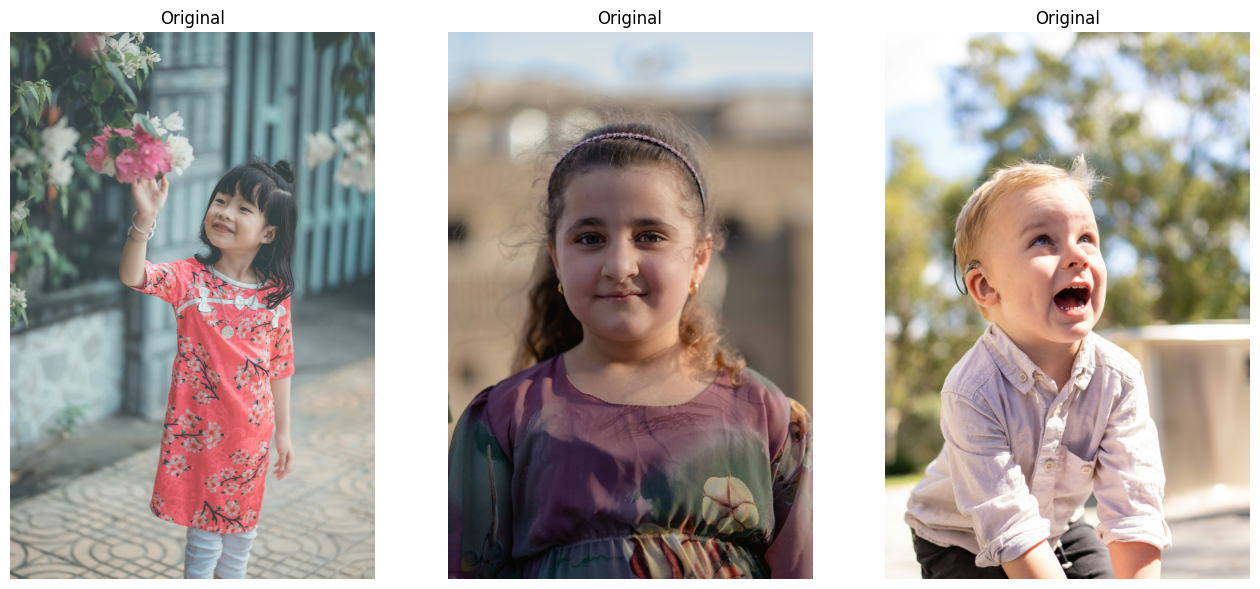

In [62]:
fig, axes = plt.subplots(1, len(images), figsize=(16, 12))
# print(len(images))

for i, image in enumerate(images):
    # axes[i, 0].imshow(image)
    axes[i].imshow(image)
    axes[i].set_title('Original')
    axes[i].axis('off')
plt.show()

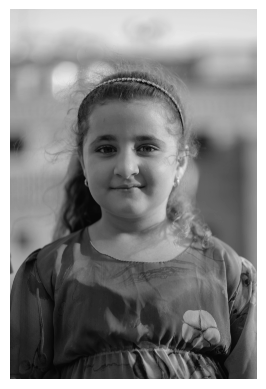

In [5]:
## convert the image in grayscale image
gray = 0.299 * image1[:,:,0] + 0.587 * image1[:,:,1] + 0.114 * image1[:,:,2]
plt.imshow(gray, cmap='gray')  # cmap = gray for correct display
plt.axis('off')
plt.show()

In [6]:
## Normalize the image
image1 = image1/255.0  ## To ensure the consistency of the pixel value scaling  for processing

[[[0.75294118 0.82745098 0.88627451]
  [0.75686275 0.83137255 0.89019608]
  [0.75686275 0.83137255 0.89019608]
  ...
  [0.78039216 0.85098039 0.90588235]
  [0.77647059 0.84705882 0.90196078]
  [0.77254902 0.84313725 0.89803922]]

 [[0.76078431 0.83529412 0.89411765]
  [0.76078431 0.83529412 0.89411765]
  [0.75686275 0.83137255 0.89019608]
  ...
  [0.78039216 0.85098039 0.90588235]
  [0.78039216 0.85098039 0.90588235]
  [0.77647059 0.84705882 0.90196078]]

 [[0.76862745 0.84313725 0.90196078]
  [0.76470588 0.83921569 0.89803922]
  [0.75686275 0.83137255 0.89019608]
  ...
  [0.78039216 0.85098039 0.90588235]
  [0.78039216 0.85098039 0.90588235]
  [0.78039216 0.85098039 0.90588235]]

 ...

 [[0.21176471 0.12156863 0.2       ]
  [0.20784314 0.11764706 0.19607843]
  [0.21568627 0.1254902  0.20392157]
  ...
  [0.59607843 0.43921569 0.44313725]
  [0.57647059 0.41960784 0.42352941]
  [0.61568627 0.45882353 0.4627451 ]]

 [[0.2        0.10980392 0.18823529]
  [0.20392157 0.11372549 0.19215686]
